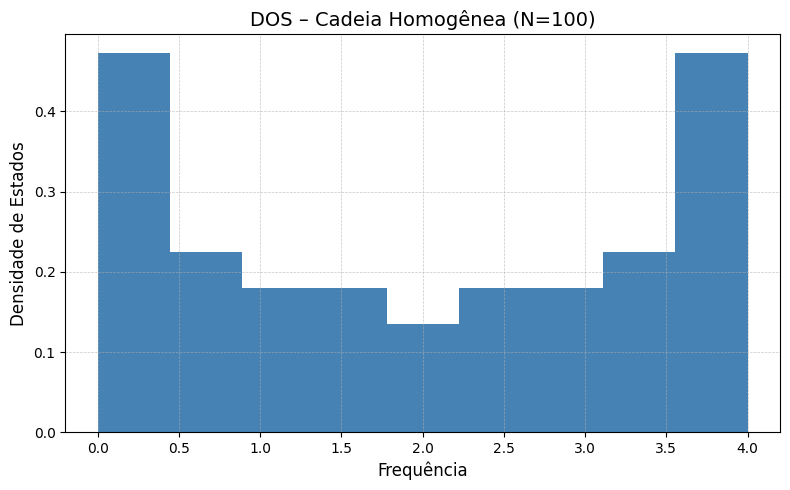

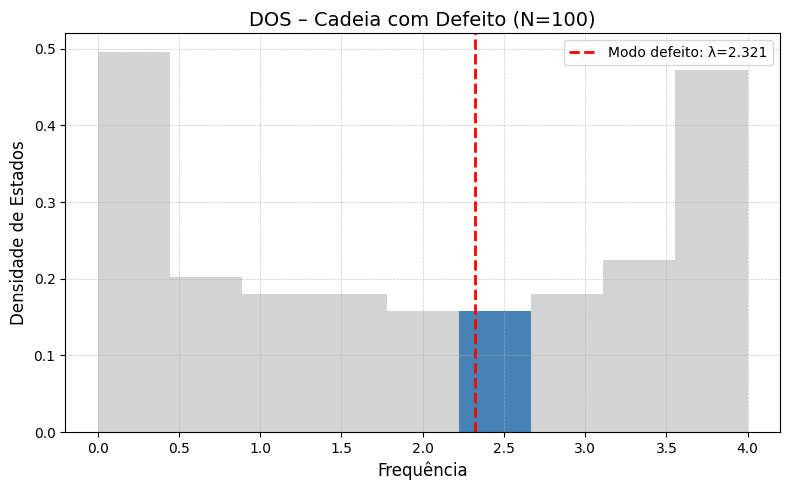

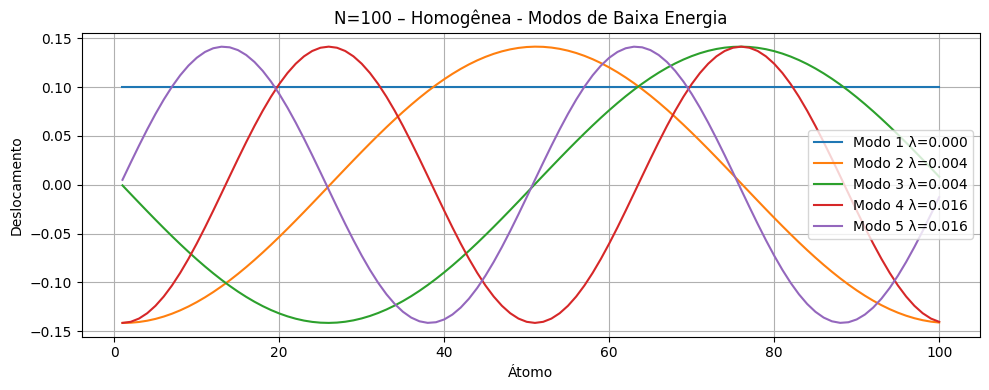

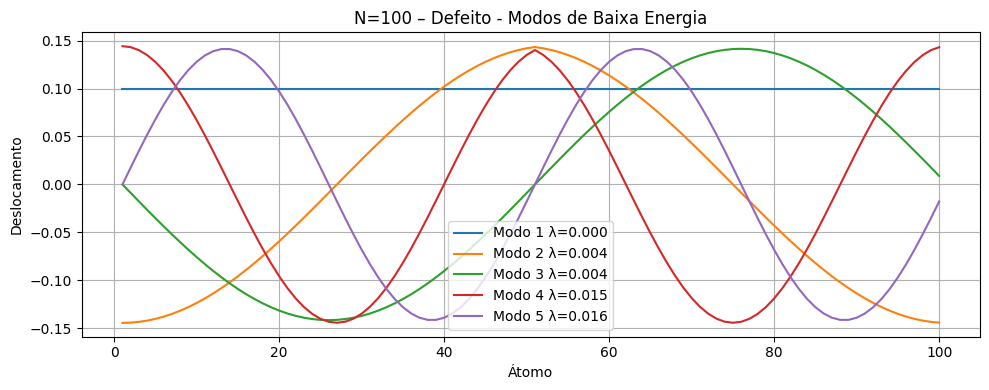

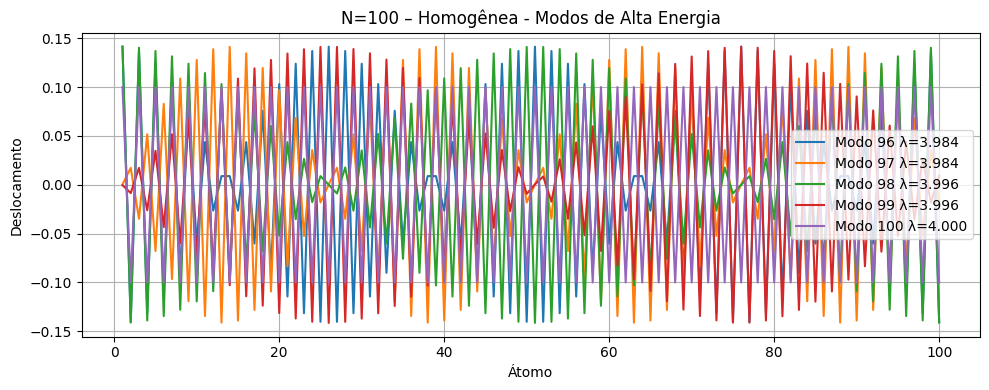

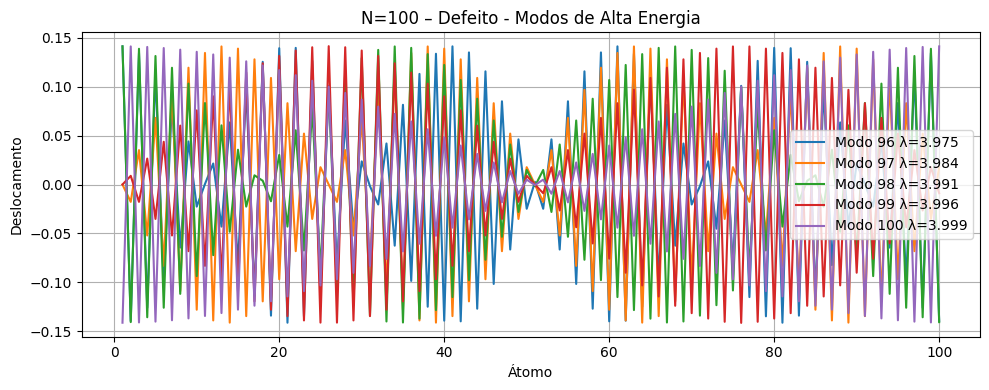

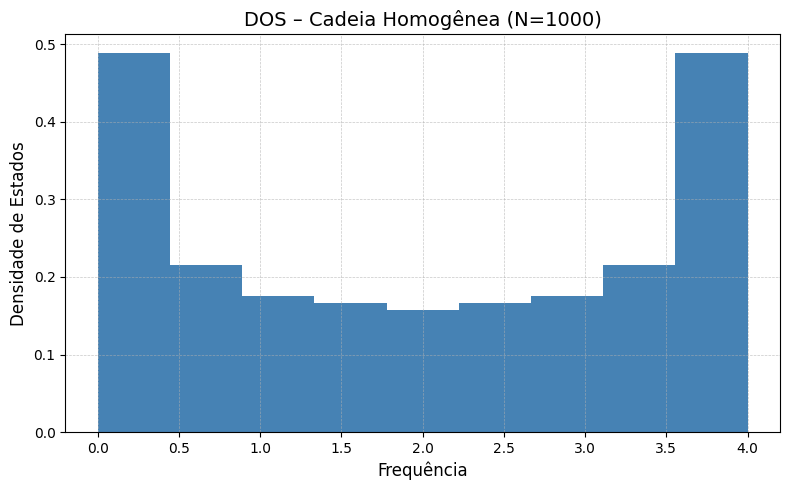

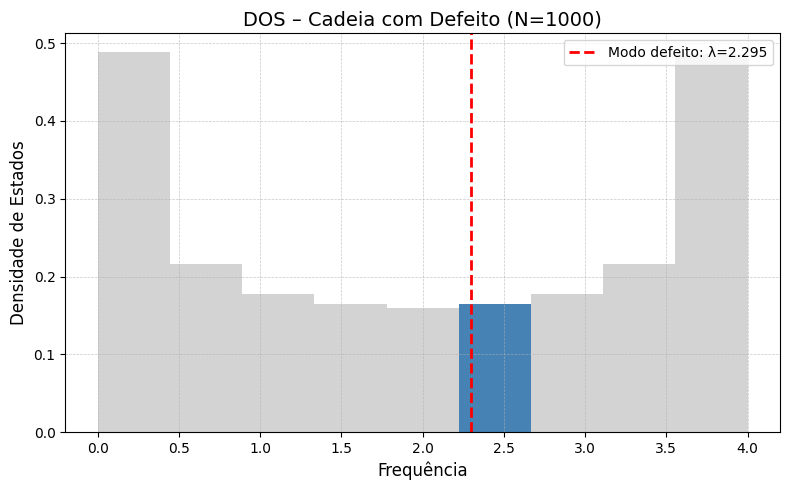

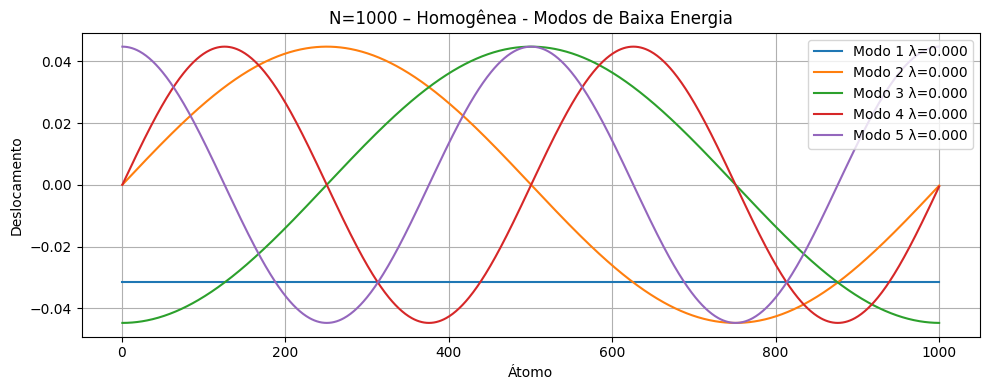

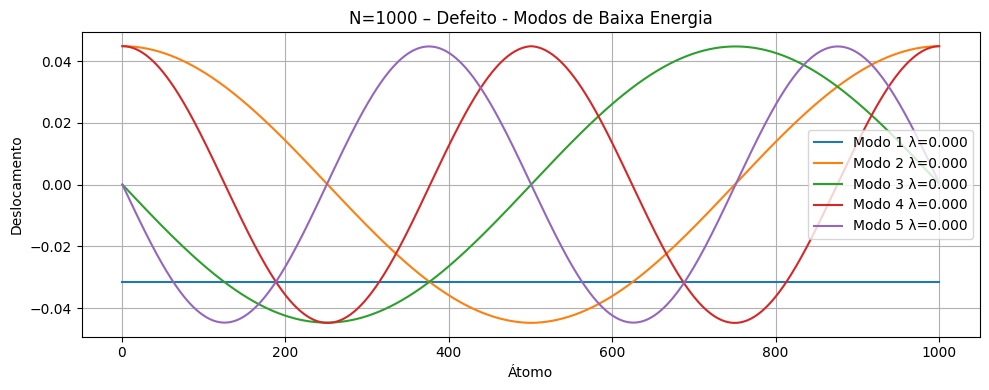

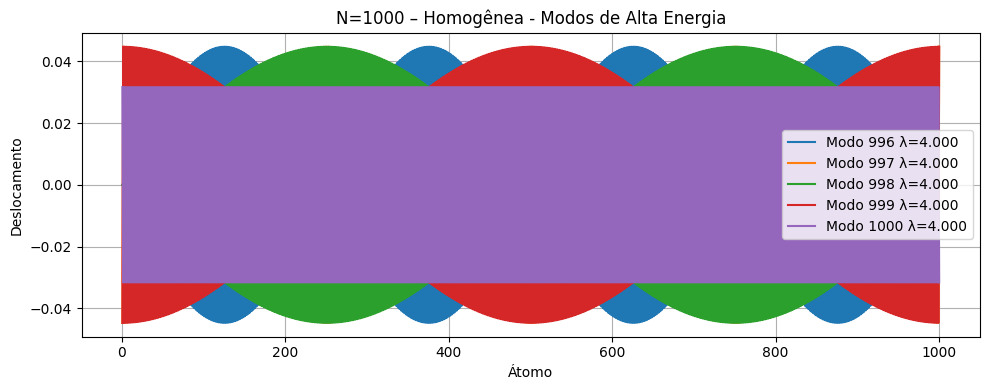

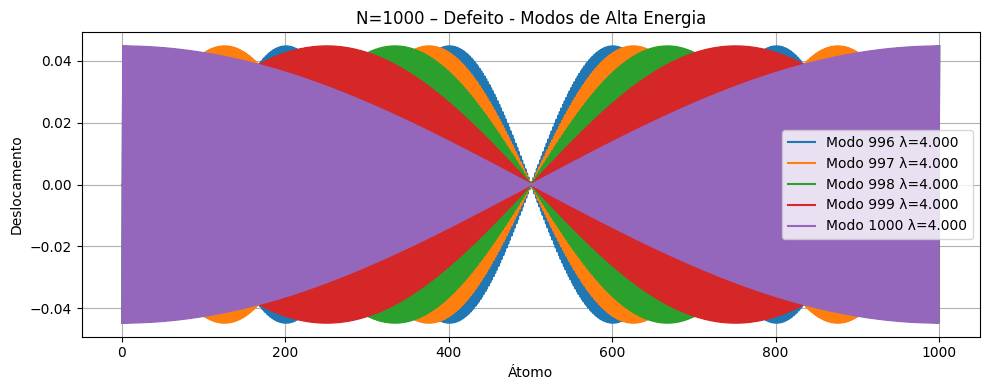

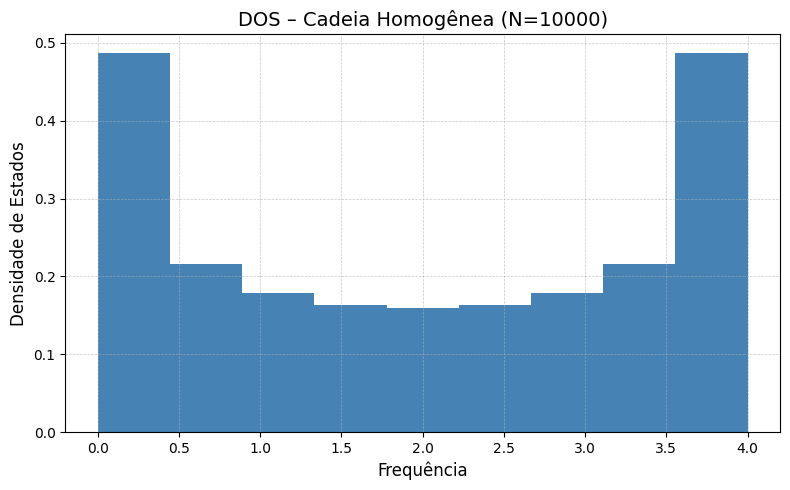

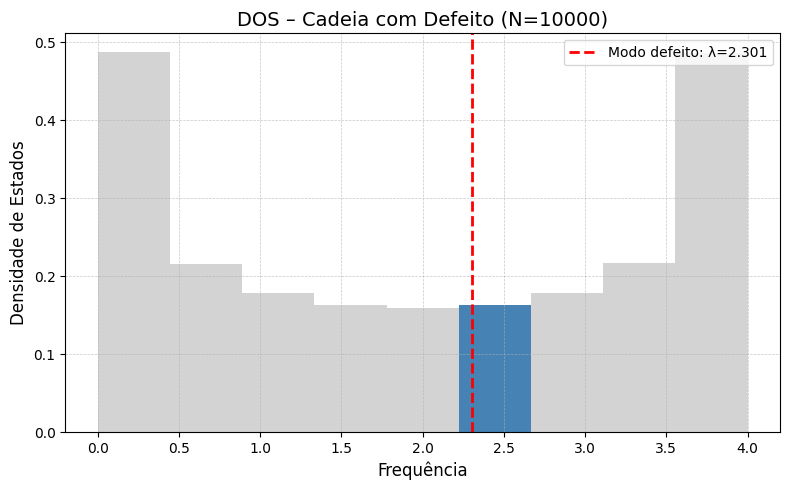

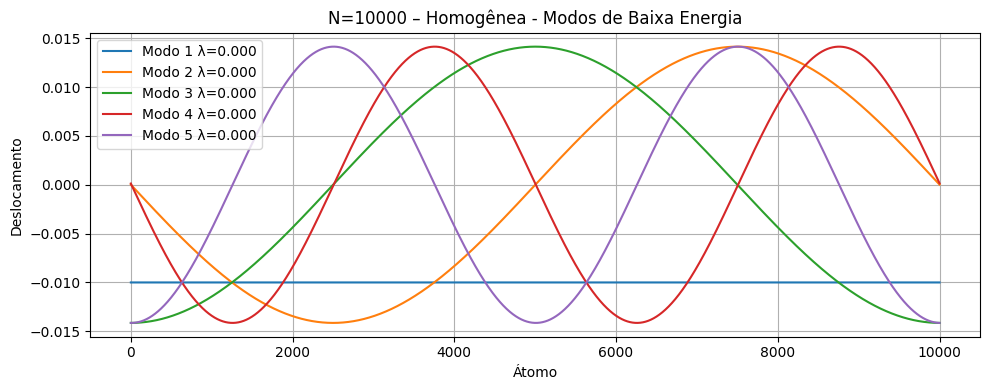

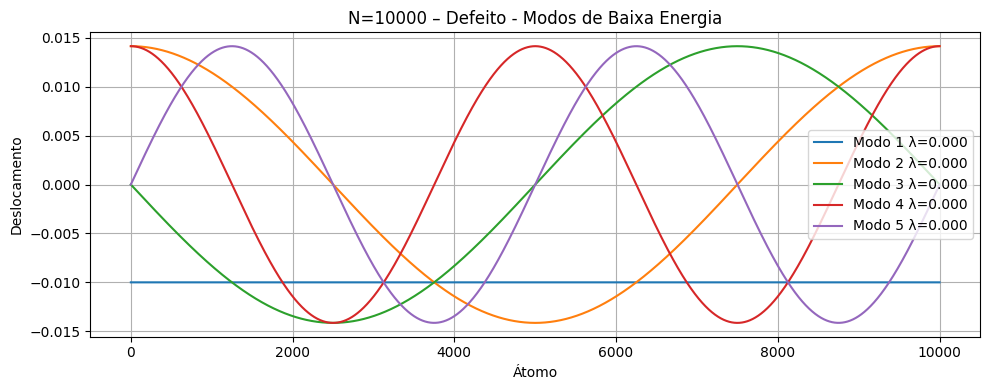

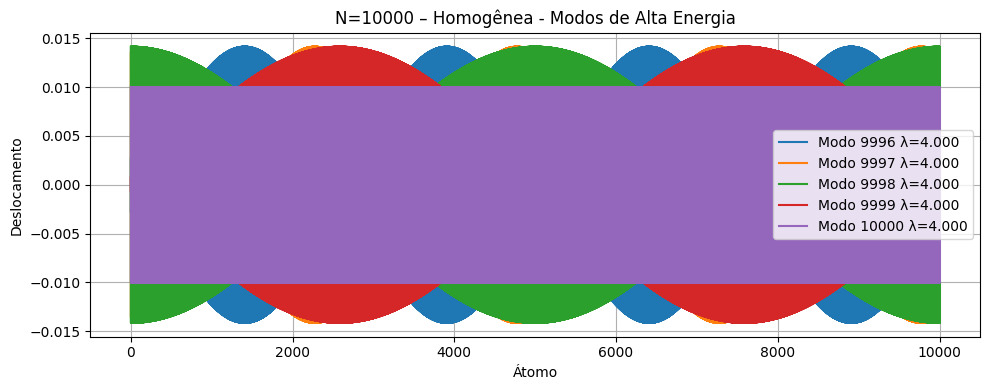

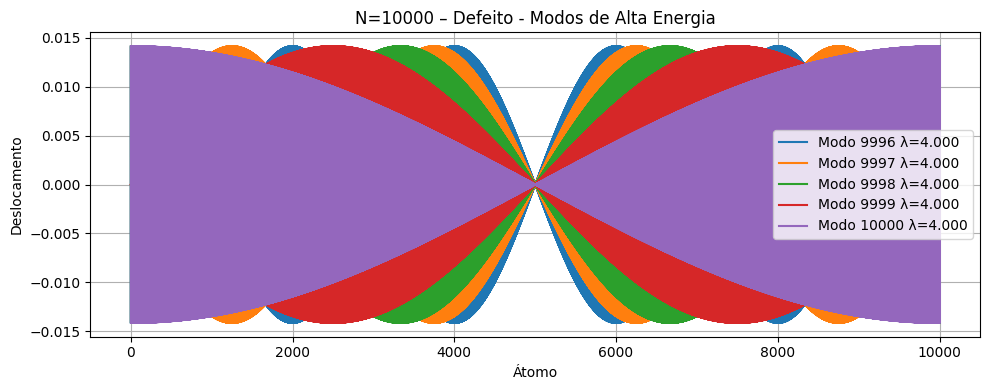

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def montar_matrizes(N, m=1.0, k=1.0, defeito=False, m2=5.0):
    """
    Monta o vetor de massas e matriz de constantes elásticas para uma cadeia 1D com condições de contorno periódicas.
    Se `defeito` for True, substitui a massa central por m2.
    """
    vet_masas = np.ones(N) * m
    if defeito:
        vet_masas[N // 2] = m2
    K = np.zeros((N, N))
    np.fill_diagonal(K, 2 * k)
    for i in range(N - 1):
        K[i, i+1] = -k
        K[i+1, i] = -k
    # condições de contorno periódicas
    K[0, N-1] = -k
    K[N-1, 0] = -k
    return vet_masas, K


def calc_eigens(N, defeito=False, m=1.0, k=1.0, m2=5.0):
    """
    Calcula valores e vetores próprios da matriz A = M^{-1} K.
    Retorna valores ordenados e vetores correspondentes.
    """
    vet_masas, K = montar_matrizes(N, m=m, k=k, defeito=defeito, m2=m2)
    M_inv = np.diag(1.0 / vet_masas)
    A = M_inv.dot(K)
    vals, vecs = np.linalg.eig(A)
    vals = np.real(vals)
    vals[vals < 0] = 0.0
    idx = np.argsort(vals)
    return vals[idx], vecs[:, idx]


def plot_dos(eig_vals, lam_def=None, title='DOS', bins=9):
    """
    Plota a densidade de estados (DOS) do espectro `eig_vals`.
    Se `lam_def` for fornecido, destaca o modo de defeito.
    """
    hist, bin_edges = np.histogram(eig_vals, bins=bins, density=True)
    bin_w = bin_edges[1] - bin_edges[0]
    colors = ('lightgrey',)
    if lam_def is not None:
        colors = [
            'steelblue' if (bin_edges[i] <= lam_def < bin_edges[i+1]) else 'lightgrey'
            for i in range(len(hist))
        ]
    plt.figure(figsize=(8, 5), dpi=100)
    if lam_def is None:
        plt.hist(eig_vals, bins=bins, density=True,
                 color='steelblue', linewidth=0.5)
    else:
        plt.bar(bin_edges[:-1], hist, width=bin_w, align='edge',
                color=colors, linewidth=0.5)
        plt.axvline(lam_def, color='red', linestyle='--', linewidth=2,
                    label=f'Modo defeito: λ={lam_def:.3f}')
        plt.legend(fontsize=10)
    plt.title(title, fontsize=14)
    plt.xlabel('Frequência', fontsize=12)
    plt.ylabel('Densidade de Estados', fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()


def plot_comparacao(N, modos=5):
    """
    Gera quatro gráficos comparativos de modos separados:
      1) Homogênea - Modos de Baixa Energia
      2) Defeito   - Modos de Baixa Energia
      3) Homogênea - Modos de Alta Energia
      4) Defeito   - Modos de Alta Energia
    """
    eig_hom_vals, eig_hom_vecs = calc_eigens(N, defeito=False)
    eig_def_vals, eig_def_vecs = calc_eigens(N, defeito=True)
    x = np.arange(1, N + 1)

    # 1) Homogênea - Modos de Baixa Energia
    plt.figure(figsize=(10, 4))
    for i in range(modos):
        plt.plot(x, eig_hom_vecs[:, i],
                 label=f'Modo {i+1} λ={eig_hom_vals[i]:.3f}')
    plt.title(f'N={N} – Homogênea - Modos de Baixa Energia')
    plt.xlabel('Átomo')
    plt.ylabel('Deslocamento')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 2) Defeito - Modos de Baixa Energia
    plt.figure(figsize=(10, 4))
    for i in range(modos):
        plt.plot(x, eig_def_vecs[:, i],
                 label=f'Modo {i+1} λ={eig_def_vals[i]:.3f}')
    plt.title(f'N={N} – Defeito - Modos de Baixa Energia')
    plt.xlabel('Átomo')
    plt.ylabel('Deslocamento')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 3) Homogênea - Modos de Alta Energia
    plt.figure(figsize=(10, 4))
    for i in range(-modos, 0):
        idx = i if i >= 0 else N + i
        plt.plot(x, eig_hom_vecs[:, i],
                 label=f'Modo {idx+1} λ={eig_hom_vals[i]:.3f}')
    plt.title(f'N={N} – Homogênea - Modos de Alta Energia')
    plt.xlabel('Átomo')
    plt.ylabel('Deslocamento')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 4) Defeito - Modos de Alta Energia
    plt.figure(figsize=(10, 4))
    for i in range(-modos, 0):
        idx = i if i >= 0 else N + i
        plt.plot(x, eig_def_vecs[:, i],
                 label=f'Modo {idx+1} λ={eig_def_vals[i]:.3f}')
    plt.title(f'N={N} – Defeito - Modos de Alta Energia')
    plt.xlabel('Átomo')
    plt.ylabel('Deslocamento')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    # Parâmetros principais
    Ns = [100, 1000, 10000]
    bins = 9
    modos_to_plot = 5

    for N in Ns:
        # Calcula espectros
        eig_hom_vals, _ = calc_eigens(N, defeito=False)
        eig_def_vals, _ = calc_eigens(N, defeito=True)

        # Identifica modo de defeito pela maior diferença
        dist = np.min(np.abs(eig_def_vals[:, None] - eig_hom_vals), axis=1)
        idx_def = np.argmax(dist)
        lam_def = eig_def_vals[idx_def]

        # Plota DOS
        plot_dos(eig_hom_vals,
                 title=f'DOS – Cadeia Homogênea (N={N})',
                 bins=bins)
        plot_dos(eig_def_vals, lam_def=lam_def,
                 title=f'DOS – Cadeia com Defeito (N={N})',
                 bins=bins)

        # Plota comparação de modos separados
        plot_comparacao(N, modos=modos_to_plot)
